In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data from analysis
#data = pd.read_csv('only_data.dat', names=['s2','dm','ji'], delim_whitespace=True)
#
data = pd.read_csv('only_data_sigma_as_exp.dat', names=['s2','dm','ji'], delim_whitespace=True)
#data = pd.read_csv('only_data_sigma_as_exp_1.dat', names=['s2','dm','ji'], delim_whitespace=True)
# Data from RENO collaboration
data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)

In [3]:
idx_min=data['ji'].idxmin()
idx_min

145759

In [4]:
dm_min = data['dm'][idx_min]
s2_min = data['s2'][idx_min]
ji_min = data['ji'][idx_min]

In [5]:
dm_min,s2_min,ji_min

(0.002676, 0.09009120403169858, 18.967985824768807)

In [6]:
data['ji']=data['ji'] - ji_min

In [7]:
#dat_68 = data[data['ji'] <= 2.3]#[['s2','dm']]
#dat_95 = data[data['ji'] <= 6.2]#[['s2','dm']]
#dat_99 = data[data['ji'] <= 11.8]#[['s2','dm']]

dat_68 = data[(data['ji'] <= 2.3) & (data['ji'] >= 2.1)]#[['s2','dm']]
dat_95 = data[(data['ji'] <= 6.2) & (data['ji'] >= 6.0)]#[['s2','dm']]
dat_99 = data[(data['ji'] <= 11.8)& (data['ji'] >= 11.6)]#[['s2','dm']]

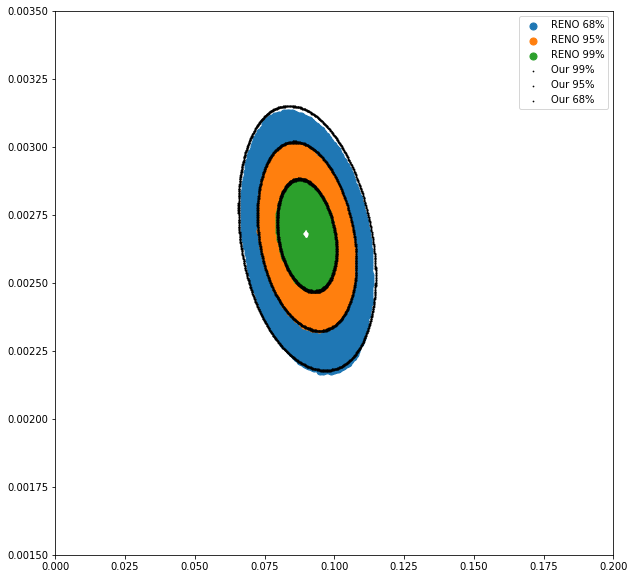

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

size=50
ax.scatter(data_cl68.s22t13, data_cl68.dmee, s=size, label='RENO 68%')
ax.scatter(data_cl95.s22t13, data_cl95.dmee, s=size, label='RENO 95%')
ax.scatter(data_cl99.s22t13, data_cl99.dmee, s=size, label='RENO 99%')
size=0.5
color='black'
ax.scatter(dat_99.s2, dat_99.dm, c=color, s=size, label='Our 99%')
ax.scatter(dat_95.s2, dat_95.dm, c=color, s=size, label='Our 95%')
ax.scatter(dat_68.s2, dat_68.dm, c=color, s=size, label='Our 68%')

ax.set_xlim(0.0, 0.2)
#ax.set_xticks([0,0.05,0.1,0.15,0.2])

ax.set_ylim(0.0015, 0.0035)
#ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.legend()

fig.savefig("reno_best_fit_param_30x30x30_f_n_reactor_flux_and_detection_energy_scale_FAR_NEAR_bkg_uncertainty_x1.1.png")
plt.show()